In [ ]:
#What is Logistic Regression ?
#Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False)
#In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.
# https://trainings.analyticsvidhya.com/courses/course-v1:AnalyticsVidhya+Python-Final-Jan-Feb+Python-Session-1/courseware/73167b5cca8447dfa535a80d3961dc61/821ac77ab0104820bfa494cb55b237d9/2

#Derivation go to the link

#Performance of Logistic Regression Model
    #1. AIC (Akaike Information Criteria)
    #2. Null Deviance and Residual Deviance
    #3. Confusion Matrix
    #4. ROC Curve
    

In [1]:
#Example from the blog
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

data = pd.read_csv('banking.csv')
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [36]:
var = data.columns

i=0;
while(i<20):
    print(var[i],' : ' ,data[var[i]].unique())
    i = i+1


age  :  [44 53 28 39 55 30 37 36 27 34 41 33 26 52 35 40 32 49 38 47 46 29 54 42
 72 48 43 56 31 24 68 59 50 45 25 57 63 58 60 64 51 23 20 74 80 61 62 75
 21 82 77 70 76 73 66 22 71 19 79 88 65 67 81 18 84 69 98 85 83 78 92 86
 94 17 91 89 87 95]
job  :  ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
marital  :  ['married' 'single' 'divorced' 'unknown']
education  :  ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
default  :  ['unknown' 'no' 'yes']
housing  :  ['yes' 'no' 'unknown']
loan  :  ['no' 'yes' 'unknown']
contact  :  ['cellular' 'telephone']
month  :  ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
day_of_week  :  ['thu' 'fri' 'tue' 'mon' 'wed']
duration  :  [ 210  138  339 ... 2260 1662 1490]
campaign  :  [ 1  3  2  8  5  4 25 11 12 18  6 17  7 20 16 14 10  9 19 29 13 40 15 34
 22 24 41 21 23 39

In [50]:
#Education has many categories. We reduce the categories for better accuracy

data['education'] = data['education'].replace('basic.4y','basic')

# or use where()
data['education'] = np.where(data['education'] == 'basic.9y', 'basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'basic', data['education'])
print(data['education'].unique())

['basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']


0    36548
1     4640
Name: y, dtype: int64


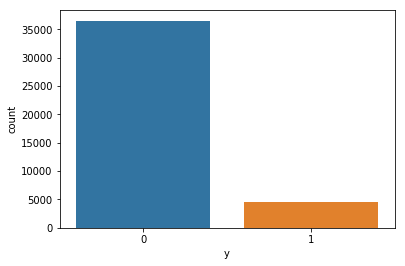

In [58]:
print(data['y'].value_counts())
sns.countplot(data['y'])

In [60]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [62]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [64]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [70]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


y                 0     1
job                      
admin.         9070  1352
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
unknown         293    37
y                     0         1
job                              
admin.         0.870274  0.129726
blue-collar    0.931057  0.068943
entrepreneur   0.914835  0.085165
housemaid      0.900000  0.100000
management     0.887825  0.112175
retired        0.747674  0.252326
self-employed  0.895144  0.104856
services       0.918619  0.081381
student        0.685714  0.314286
technician     0.891740  0.108260
unemployed     0.857988  0.142012
unknown        0.887879  0.112121


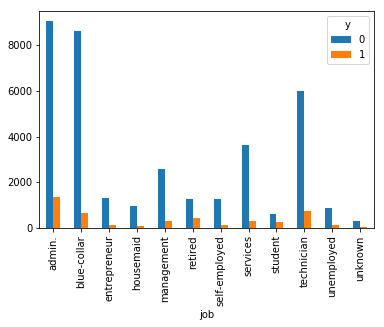

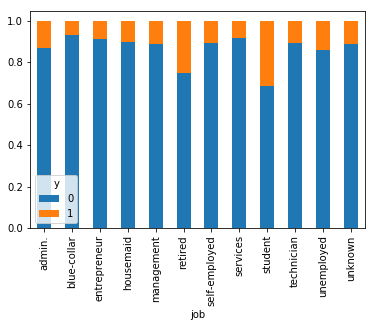

In [124]:
#Visualization
t_job = pd.crosstab(data['job'], data['y'])
t_job.plot(kind='bar')
t_job_div = t_job.div(t_job.sum(1).astype(float), axis=0)
t_job_div.plot(kind='bar', stacked=True) # NOTE: plot is in pandas module not in matplolib
print(t_job)
print(t_job_div)

y                        0     1
education                       
basic                11424  1089
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    10498  1670
unknown               1480   251
y                           0         1
education                              
basic                0.912971  0.087029
high.school          0.891645  0.108355
illiterate           0.777778  0.222222
professional.course  0.886515  0.113485
university.degree    0.862755  0.137245
unknown              0.854997  0.145003


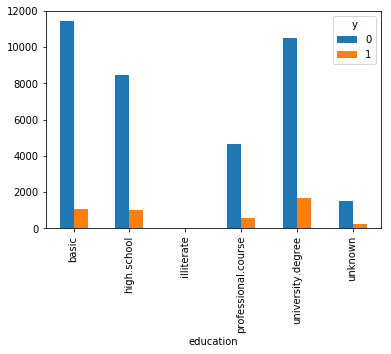

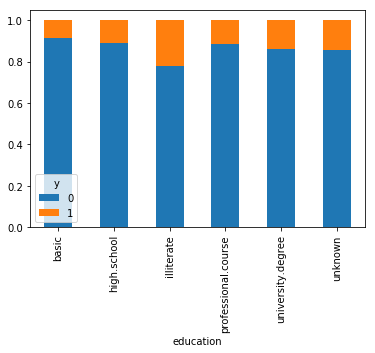

In [125]:
t_edu = pd.crosstab(data['education'], data['y'])
t_edu_div = t_edu.div(t_edu.sum(1).astype(float),axis=0)
print(t_edu)
print(t_edu_div)
t_edu.plot(kind = 'bar')
t_edu_div.plot(kind='bar', stacked = True)


y             0     1
marital              
divorced   4136   476
married   22396  2532
single     9948  1620
unknown      68    12
y                0         1
marital                     
divorced  0.896791  0.103209
married   0.898427  0.101573
single    0.859959  0.140041
unknown   0.850000  0.150000


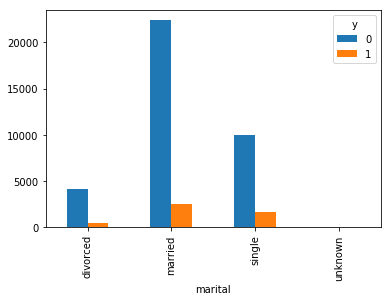

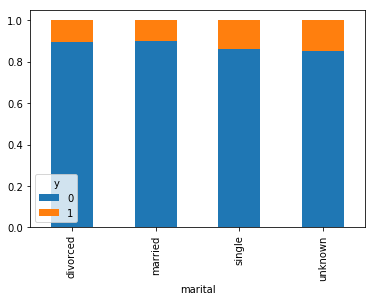

In [122]:
t=pd.crosstab(data['marital'],data['y'])
t.plot(kind='bar')
print(t)
t2=t.div(t.sum(1).astype(float), axis = 0)
t2.plot(kind='bar',stacked =True)
print(t2)


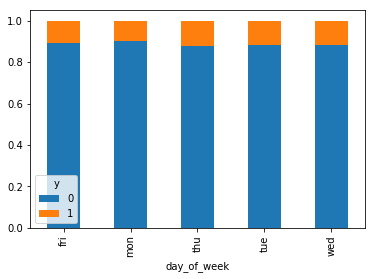

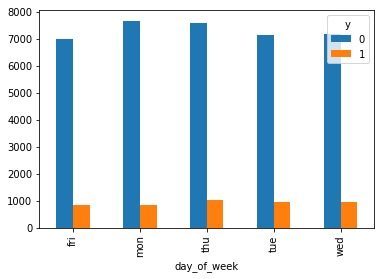

In [118]:
t_dow = pd.crosstab(data['day_of_week'], data['y'])
t_dow_div = t_dow.div(t_dow.sum(1).astype(float), axis = 0)
t_dow_div.plot(kind= 'bar',stacked=True)
t_dow.plot(kind='bar')

y             0         1
month                    
apr    0.795213  0.204787
aug    0.893979  0.106021
dec    0.510989  0.489011
jul    0.909534  0.090466
jun    0.894885  0.105115
mar    0.494505  0.505495
may    0.935653  0.064347
nov    0.898561  0.101439
oct    0.561281  0.438719
sep    0.550877  0.449123


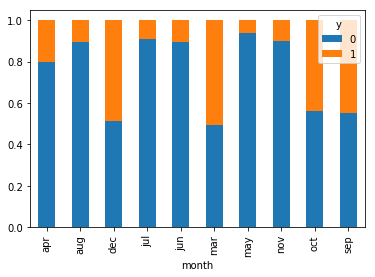

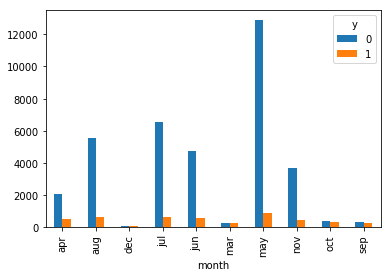

In [121]:
t_mon = pd.crosstab(data['month'], data['y'])
t_mon_div = t_mon.div(t_mon.sum(1).astype(float), axis = 0)
t_mon_div.plot(kind= 'bar',stacked=True)
t_mon.plot(kind='bar')
print(t_mon_div)

y             0         1
month                    
apr    0.795213  0.204787
aug    0.893979  0.106021
dec    0.510989  0.489011
jul    0.909534  0.090466
jun    0.894885  0.105115
mar    0.494505  0.505495
may    0.935653  0.064347
nov    0.898561  0.101439
oct    0.561281  0.438719
sep    0.550877  0.449123


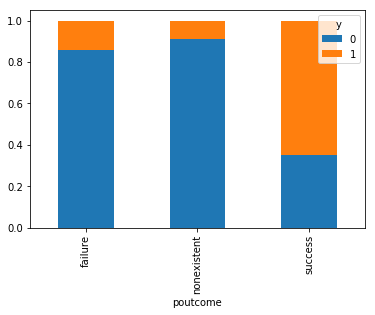

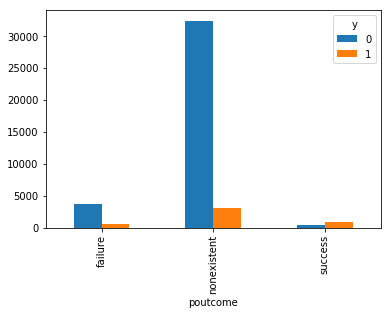

In [130]:
t_pout = pd.crosstab(data['poutcome'], data['y'])
t_pout_div = t_pout.div(t_pout.sum(1).astype(float), axis = 0)
t_pout_div.plot(kind= 'bar',stacked=True)
t_pout.plot(kind='bar')
print(t_mon_div)

In [139]:
print(data['default'].value_counts())
print(data['housing'].value_counts())
print(data['loan'].value_counts())
print(data['contact'].value_counts())

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
cellular     26144
telephone    15044
Name: contact, dtype: int64


y            0     1
default             
no       28391  4197
unknown   8154   443
yes          3     0
y              0        1
default                  
no       0.87121  0.12879
unknown  0.94847  0.05153
yes      1.00000  0.00000


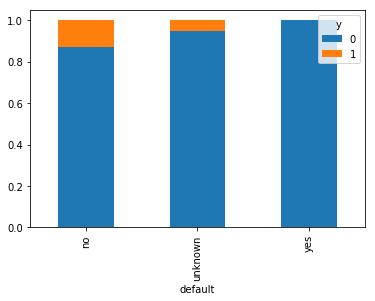

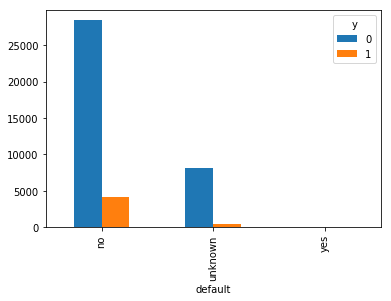

In [147]:
t_def = pd.crosstab(data['default'], data['y'])
t_def_div = t_def.div(t_def.sum(1).astype(float), axis = 0)
t_def_div.plot(kind= 'bar',stacked=True)
t_def.plot(kind='bar')
print(t_def)
print(t_def_div)

y            0     1
housing             
no       16596  2026
unknown    883   107
yes      19069  2507
y               0         1
housing                    
no       0.891204  0.108796
unknown  0.891919  0.108081
yes      0.883806  0.116194


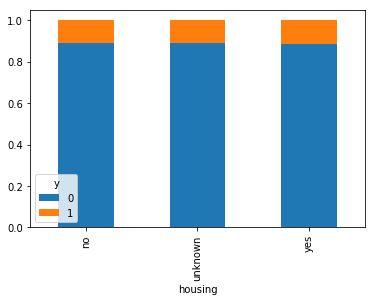

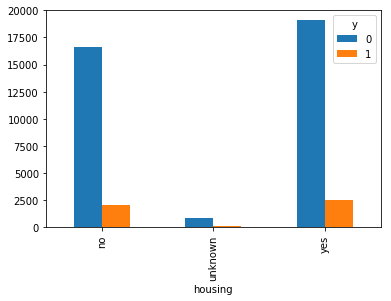

In [145]:
t_hous = pd.crosstab(data['housing'], data['y'])
t_hous_div = t_hous.div(t_hous.sum(1).astype(float), axis = 0)
t_hous_div.plot(kind= 'bar',stacked=True)
t_hous.plot(kind='bar')
print(t_hous)
print(t_hous_div)

y            0     1
loan                
no       30100  3850
unknown    883   107
yes       5565   683
y               0         1
loan                       
no       0.886598  0.113402
unknown  0.891919  0.108081
yes      0.890685  0.109315


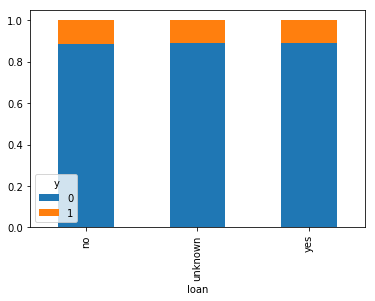

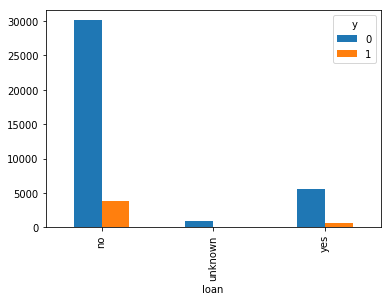

In [143]:
t_loan = pd.crosstab(data['loan'], data['y'])
t_loan_div = t_loan.div(t_loan.sum(1).astype(float), axis = 0)
t_loan_div.plot(kind= 'bar',stacked=True)
t_loan.plot(kind='bar')
print(t_loan)
print(t_loan_div)

y              0     1
contact               
cellular   22291  3853
telephone  14257   787
y                 0         1
contact                      
cellular   0.852624  0.147376
telephone  0.947687  0.052313


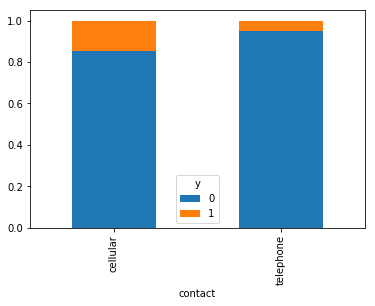

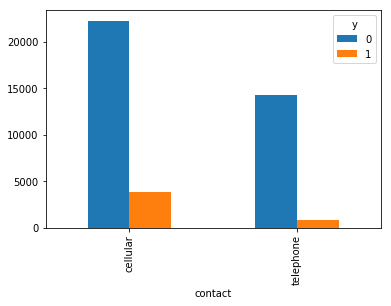

In [148]:
t_con = pd.crosstab(data['contact'], data['y'])
t_con_div = t_con.div(t_con.sum(1).astype(float), axis = 0)
t_con_div.plot(kind= 'bar',stacked=True)
t_con.plot(kind='bar')
print(t_con)
print(t_con_div)

In [152]:
# job, education, month, poutcome , default, contact are good predictors 
# marital, day_of_week , housing, loan variables are not good predictors 


In [200]:

# Get Dummies (run only onc eotherwise it will show overlap error as given below)
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1


cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=data[to_keep]
data_final.columns.values

ValueError: columns overlap but no suffix specified: Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown'],
      dtype='object')

In [207]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
X

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_t

In [182]:
#Feature Selection
data_final.shape
data_final.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
      

In [208]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg,18)
rfe = rfe.fit(data_final[X], data_final[y])
print(rfe.support_)
print(rfe.ranking_)


/home/ashu6811/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False False  True False False False  True False False  True
 False False False  True False  True  True False False False False False
 False False False False False False False False  True False False False
 False False False False False False  True  True  True False False False
  True  True  True False False False  True False False  True  True  True
  True]
[35 33 12 41  1 17 20 21  1 31 11  1 29 40 42  1 28  1  1 27 25 39  2  3
  4 43  6  7 38  8 10 16  1 19 44 36 15 37 13 18 14 23  1  1  1 26 22 24
  1  1  1 32  5  9  1 34 30  1  1  1  1]


In [209]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
X=data_final[cols]
y=data_final['y']

In [210]:
#Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.287116
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Tue, 26 Jun 2018   Pseudo R-squ.:                  0.1844
Time:                        14:27:57   Log-Likelihood:                -11826.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                 0.2385      0.051      4.642      0.000       0.138       0.339

In [211]:
#Logistic Regression Model Fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [212]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [213]:
#Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.897


In [214]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10872   109]
 [ 1122   254]]


In [215]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10981
          1       0.70      0.18      0.29      1376

avg / total       0.88      0.90      0.87     12357



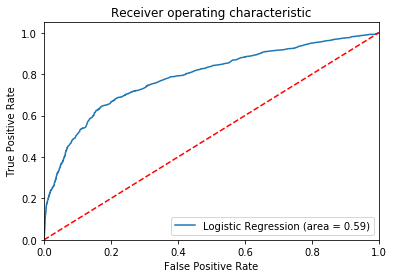

In [220]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()